#Converts polygons to pixels

In [2]:
#Imports
import cv2
import json
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [59]:
json_filename = 'train_annotations.json'
read_file = open(json_filename, "r") 
data = json.load(read_file)

annotations = {}
#[f"train_{index}.tif"]
#print((data["images"][0]))
for index, image in enumerate(data["images"]):
    polys=[]
    for polygons in image["annotations"]:
        geom = np.array(polygons['segmentation'])
        polys.append((polygons["class"],geom))
    annotations[data["images"][index]["file_name"]]=polys
print(f"Number of annotations:{len(annotations)}")


Number of annotations:176


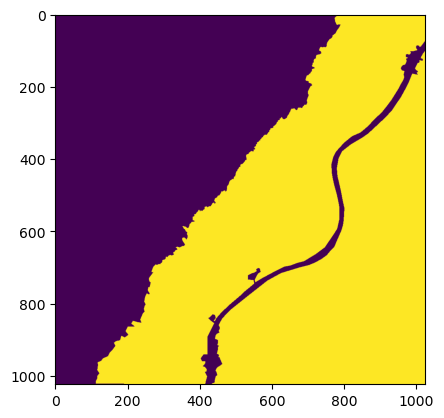

In [70]:
#Test mask
#number of pictures
n = 10
shape = (1024, 1024)
raster_imgs={}
annotation_color_allocation = {
    'plantation' : 164, 
    'grassland_shrubland' : 128, 
    'mining' : 192,
    'logging' : 256,
}  
for current_image in range(n):
    Image.MAX_IMAGE_PIXELS = None
    img = Image.new('L', (shape[1], shape[0]), 0)  # (w, h)
    for i in range(len(annotations[f"train_{current_image}.tif"])):
        
        poly = annotations[f"train_{current_image}.tif"][i][1]
        type_deforest= annotations[f"train_{current_image}.tif"][i][0]
        points = list(zip(poly[::2], poly[1::2]))
        for point in range(len(points)):
            last= points[point][1]
            first= points[point][0]
            points[point]=(first,1024-last)
            
        ImageDraw.Draw(img).polygon(points, outline=i + 1, fill=annotation_color_allocation[type_deforest])
    mask_2 = np.array(img)
    raster_imgs[f"train_{current_image}.tif"]=mask_2
#plt.imshow(raster_imgs[f"train_{0}.tif"])

for i in range(n):
    plt.imshow(raster_imgs[f"train_{i}.tif"])
